**Required Libraries**



In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from datetime import datetime
import cv2
from PIL import Image
import zipfile
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array

**Conncet With Drive**

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Extract dataset**

In [ ]:
children_supplement_dataset = "/content/drive/MyDrive/Student/Ovi/Data_Set/Children's Dental/Children_s teeth - supplement.zip"
children_dental_dataset = '/content/drive/MyDrive/Student/Ovi/Data_Set/Children\'s Dental/Children\'s dental caries segmentation dataset.zip'
os.system(f'unzip "{children_supplement_dataset}" -d /content/Child_Supplement')
os.system(f'unzip "{children_dental_dataset}" -d /content/Children_Dental')

256

**Preprocess and combining Images**

In [ ]:
import os
import cv2
import numpy as np

# Function to load, resize, and normalize images and masks
def load_and_preprocess_images(image_dir, mask_dir, img_size=(256, 256)):
    images = []
    masks = []

    # Get the list of images and masks
    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    # Loop over each file in the directory
    for img_file, mask_file in zip(image_filenames, mask_filenames):
        # Load the image and mask
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize to the desired size (256x256)
        image = cv2.resize(image, img_size)
        mask = cv2.resize(mask, img_size)

        # Normalize image pixel values to [0, 1] range
        image = image.astype(np.float32) / 255.0
        mask = mask.astype(np.float32) / 255.0

        # Append the processed image and mask to the list
        images.append(img_to_array(image))
        masks.append(img_to_array(mask))

    return np.array(images), np.array(masks)

# Paths to your datasets
supplement_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Supplemental content-93/images"
supplement_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Supplemental content-93/mask"

children_supplement_images_path = "/content/Child_Supplement/Children_s teeth - supplement/新数据集/img"
children_supplement_masks_path = "/content/Child_Supplement/Children_s teeth - supplement/新数据集/mask"

children_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train/images"
children_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train/mask"

children_test_images_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test/images"
children_test_masks_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test/mask"

# Process each dataset
child_supp_images,child_supp_masks = load_and_preprocess_images(children_supplement_images_path, children_supplement_masks_path)
supp_images, supp_masks = load_and_preprocess_images(supplement_images_path, supplement_masks_path)
train_images, train_masks = load_and_preprocess_images(children_images_path, children_masks_path)
test_images, test_masks = load_and_preprocess_images(children_test_images_path, children_test_masks_path)

# Combine the datasets
combined_images = np.concatenate([supp_images, train_images, test_images,child_supp_images], axis=0)
combined_masks = np.concatenate([supp_masks, train_masks, test_masks,child_supp_masks], axis=0)

print(f"Combined images shape: {combined_images.shape}")
print(f"Combined masks shape: {combined_masks.shape}")


Combined images shape: (323, 256, 256, 3)
Combined masks shape: (323, 256, 256, 1)


In [ ]:
import os
X_test_location=[]
Y_test_location=[]
# Define the base path
base_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Test"

# Define the paths for the images and masks directories
images_path = os.path.join(base_path, 'images')
masks_path = os.path.join(base_path, 'mask')

# List all the file names in the images and masks directories
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Display the file names
print("Image Files:")
for filename in image_files:
    X_test_location.append(os.path.join(images_path, filename))
    #print(filename)

print("\nMask Files:")
for filename in mask_files:
    Y_test_location.append(os.path.join(masks_path, filename))
    #print(filename)

Image Files:

Mask Files:


In [ ]:
import os
X_train_location=[]
Y_train_location=[]
# Define the base path
base_path = "/content/Children_Dental/Children's dental caries segmentation dataset/Train"

# Define the paths for the images and masks directories
images_path = os.path.join(base_path, 'images')
masks_path = os.path.join(base_path, 'mask')

# List all the file names in the images and masks directories
image_files = os.listdir(images_path)
mask_files = os.listdir(masks_path)

# Display the file names
print("Image Files:")
for filename in image_files:
    X_train_location.append(os.path.join(images_path, filename))
    #print(filename)

print("\nMask Files:")
for filename in mask_files:
    Y_train_location.append(os.path.join(masks_path, filename))
    #print(filename)



Image Files:

Mask Files:


X_train shape: (323, 256, 256, 3)
X_test shape: (30, 256, 256, 3)


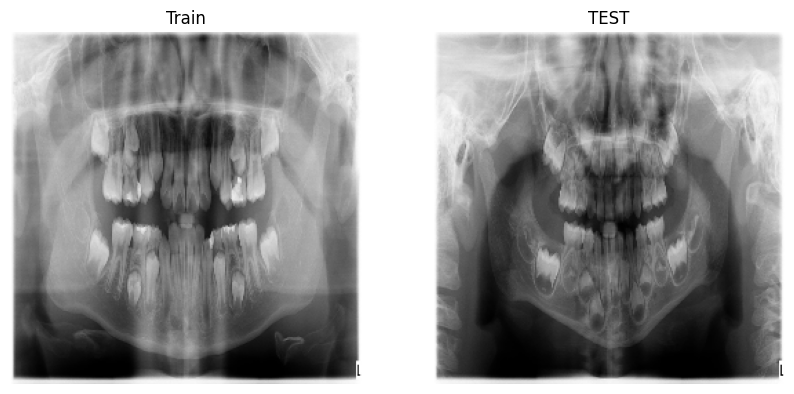

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(256,256 )):
    images = []

    for image_path in image_paths:
        # Load the image
        image = load_img(image_path, target_size=target_size)

        # Convert image to array (float type by default)
        image_array = img_to_array(image)

        # Normalize the image
        image_array = image_array / 255.0

        # Append to list
        images.append(image_array)

    # Convert list to numpy array
    images = np.array(images)

    return images

# Load and preprocess images
X_train = combined_images
X_test = load_and_preprocess_images(X_test_location)
# Verify the shape of the dataset
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(X_train[10])
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(X_test[10])
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

Y_train shape: (323, 256, 256, 1)
Y_test shape: (30, 256, 256, 1)


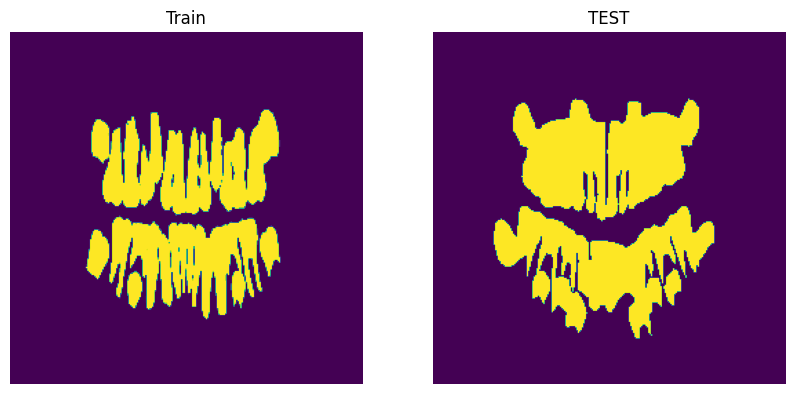

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(image_paths, target_size=(256, 256)):
    images = []

    for image_path in image_paths:
        # Load the image
        image = load_img(image_path, target_size=target_size, color_mode="grayscale")

        # Convert image to array (float type by default)
        image_array = img_to_array(image)

        # Normalize the image
        image_array = image_array / 255.0

        # Append to list
        images.append(image_array)

    # Convert list to numpy array
    images = np.array(images)

    return images

# Load and preprocess images
Y_train = combined_masks
Y_test = load_and_preprocess_images(Y_test_location)
# Verify the shape of the dataset
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.squeeze(Y_train[10]))
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(Y_test[10])
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

In [ ]:
Y_train[Y_train > 0] = 1
Y_test[Y_test > 0] = 1
# Verify the change
print(np.unique(Y_test))  # This should print only 0 and 1

[0. 1.]


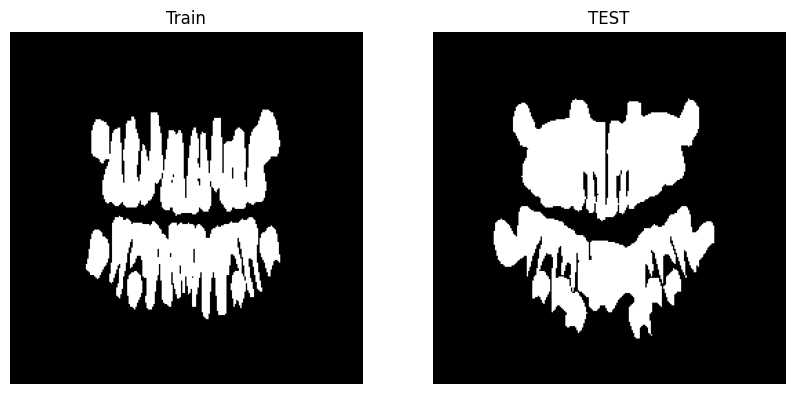

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(Y_train[10],cmap='gray')
axes[0].set_title('Train')
axes[0].axis('off')

axes[1].imshow(Y_test[10],cmap='gray')
axes[1].set_title('TEST')
axes[1].axis('off')

plt.show()

**Performance Metrics**

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall_value = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall_value

def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision_value = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision_value

def specificity(y_true, y_pred):
    true_negatives = tf.reduce_sum(tf.round(tf.clip_by_value((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(1 - y_true, 0, 1)))
    specificity_value = true_negatives / (possible_negatives + tf.keras.backend.epsilon())
    return specificity_value

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_value = 2 * (prec * rec) / (prec + rec + tf.keras.backend.epsilon())
    return f1_value

def jaccard_index(y_true, y_pred, threshold=0.5):
    # Apply threshold to predictions
    y_pred = tf.cast(y_pred > threshold, tf.float32)

    # Flatten the tensors
    y_true_f = tf.reshape(y_true, (-1,))
    y_pred_f = tf.reshape(y_pred, (-1,))

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    sum_ = tf.reduce_sum(y_true_f + y_pred_f)

    # Compute the Jaccard index (IoU)
    jaccard_value = intersection / (sum_ - intersection + tf.keras.backend.epsilon())

    return jaccard_value

def mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

import tensorflow as tf

def mean_iou(y_true, y_pred, threshold=0.5):
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    total = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    union = total - intersection

    # Calculate IoU
    iou = intersection / (union + tf.keras.backend.epsilon())
    return iou


def dice_coeff(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)
    return (2. * intersection + smooth) / (union + smooth)

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)
    return 1 - (2. * intersection + smooth) / (union + smooth)


**SegUnet Model with VGG16 Backbone**

In [ ]:

import tensorflow as tf
from keras.layers import Input, Conv2D, Activation, BatchNormalization, MaxPooling2D, UpSampling2D, Concatenate
from keras.models import Model

def CreateSegUNet(input_shape=(256, 256, 3), n_labels=1, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
    inputs = Input(shape=input_shape)

    # Encoder
    conv_1 = Conv2D(64, (kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)

    conv_2 = Conv2D(64, (kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1 = MaxPooling2D(pool_size=pool_size)(conv_2)

    conv_3 = Conv2D(128, (kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)

    conv_4 = Conv2D(128, (kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2 = MaxPooling2D(pool_size=pool_size)(conv_4)

    # Decoder
    up_1 = UpSampling2D(size=(2, 2))(pool_2)  # Upsample to match conv_4 dimensions
    concat_1 = Concatenate()([up_1, conv_4])

    conv_5 = Conv2D(128, (kernel, kernel), padding="same")(concat_1)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)

    up_2 = UpSampling2D(size=(2, 2))(conv_5)  # Upsample to match conv_2 dimensions
    concat_2 = Concatenate()([up_2, conv_2])

    conv_6 = Conv2D(64, (kernel, kernel), padding="same")(concat_2)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)

    # Final convolution layer to get desired output shape (256, 256, 1)
    conv_7 = Conv2D(n_labels, (1, 1), padding="same")(conv_6)

    # Apply output activation (e.g., sigmoid or softmax)
    outputs = Activation(output_mode)(conv_7)

    segunet = Model(inputs=inputs, outputs=outputs, name="SegUNet")
    return segunet

# Create the model with input shape (256, 256, 3) and output shape (256, 256, 1)
model = CreateSegUNet(input_shape=(256, 256, 3), n_labels=1)

# Model Summary
model.summary()


Model: "SegUNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 256, 256, 64)   │            256 │ conv2d_26[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_26             │ (None, 256, 256, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ activation_26[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 256, 256, 64)   │            256 │ conv2d_27[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_27             │ (None, 256, 256, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ activation_27[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 128, 128, 128)  │            512 │ conv2d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_26    │ (None, 128, 128, 128)  │            512 │ conv2d_29[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1      

 Total params: 668,225 (2.55 MB)

 Trainable params: 667,073 (2.54 MB)

 Non-trainable params: 1,152 (4.50 KB)

**Train-Test Split**

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
x_temp, x_test, y_temp, y_test = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, shuffle=True)

# 2. Now split the remaining 80% data into 70% train and 10% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.125, random_state=42, shuffle=True)

# Check the shapes of the splits
print(f"Training images shape: {x_train.shape}")
print(f"Training masks shape: {y_train.shape}")
print(f"Validation images shape: {x_val.shape}")
print(f"Validation masks shape: {y_val.shape}")
print(f"Testing images shape: {x_test.shape}")
print(f"Testing masks shape: {y_test.shape}")

Training images shape: (225, 256, 256, 3)
Training masks shape: (225, 256, 256, 1)
Validation images shape: (33, 256, 256, 3)
Validation masks shape: (33, 256, 256, 1)
Testing images shape: (65, 256, 256, 3)
Testing masks shape: (65, 256, 256, 1)


**Model training and Save**

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
import keras
from keras.metrics import BinaryIoU
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min', verbose=1)
CSV_logger = CSVLogger('/content/drive/MyDrive/Student/Ovi/CSV_files/EXPSegUnetCombine_Supplement_Supplemnt130_Child_TestSet_TrainSet_WithOutBBTTS.csv', append=False)

start1 = datetime.now()
model.compile(loss= dice_loss,optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy',BinaryIoU(
    target_class_ids=(0, 1), threshold=0.5, name=None, dtype=None
), mean_iou,dice_coeff,recall,precision,mae,jaccard_index,f1_score, specificity])


# Train the model
history = model.fit( x_train, y_train,
                        validation_data=(x_val,y_val) ,
                        epochs=200,
                        shuffle=True,
                        batch_size=8,
                        callbacks=[early_stopping, CSV_logger])
model.save('/content/drive/MyDrive/Student/Ovi/Model & Graph/EXPSegUnetCombine_Supplement_Supplemnt130_Child_TestSet_TrainSet_WithOutBBTTS.keras')

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 488ms/step - accuracy: 0.5718 - binary_io_u_2: 0.3792 - dice_coeff: 0.3760 - f1_score: 0.4191 - jaccard_index: 0.2705 - loss: 0.6243 - mae: 0.4414 - mean_iou: 0.2705 - precision: 0.2778 - recall: 0.9132 - specificity: 0.5105 - val_accuracy: 0.8474 - val_binary_io_u_2: 0.4237 - val_dice_coeff: 0.2106 - val_f1_score: 0.0000e+00 - val_jaccard_index: 0.0000e+00 - val_loss: 0.7933 - val_mae: 0.3772 - val_mean_iou: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_specificity: 1.0000
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8433 - binary_io_u_2: 0.6485 - dice_coeff: 0.5593 - f1_score: 0.6486 - jaccard_index: 0.4810 - loss: 0.4407 - mae: 0.2257 - mean_iou: 0.4810 - precision: 0.5031 - recall: 0.9183 - specificity: 0.8295 - val_accuracy: 0.8474 - val_binary_io_u_2: 0.4237 - val_dice_coeff: 0.1710 - val_f1_score: 0.0000e+00 - val_jaccard_index: 0.0000e+00 - val_loss: 0.8320 - val_mae: 0.2909 - val_mean_iou:

**Showing Predicted Mask**

7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


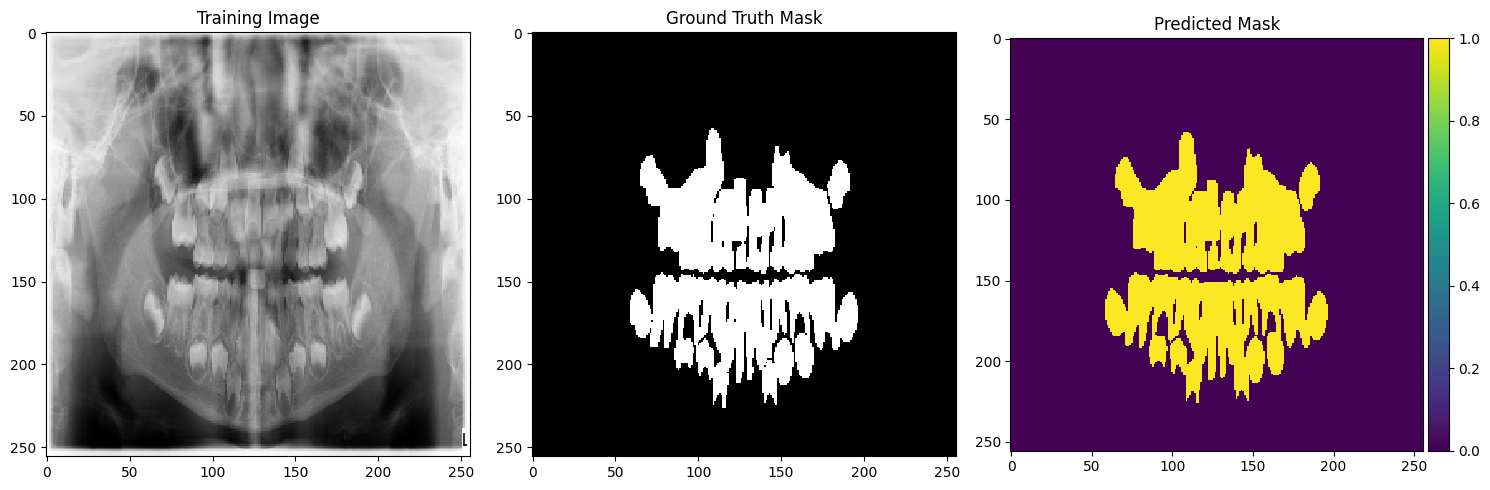

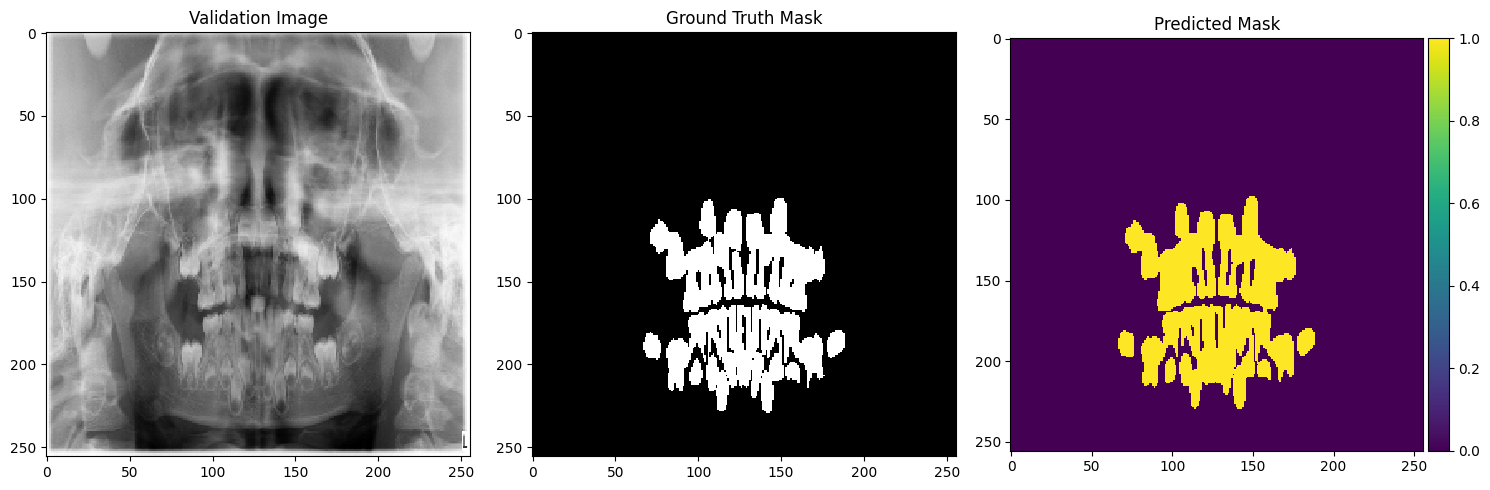

In [ ]:
import tensorflow as tf
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
model=model
idx = random.randint(0, len(x_test))

preds_train = model.predict(x_train[:int(x_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(x_train[int(x_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(x_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Training Image')
imshow(x_train[ix])

plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
imshow(np.squeeze(y_train[ix]))


plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
imshow(np.squeeze(preds_train_t[ix]))

plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Validation Image')
imshow(x_train[int(x_train.shape[0]*0.9):][ix])

plt.subplot(1, 3, 2)
plt.title('Ground Truth Mask')
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

**Model Graphs**

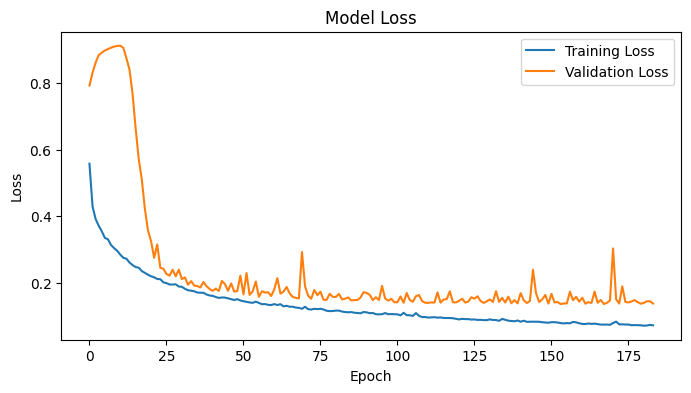

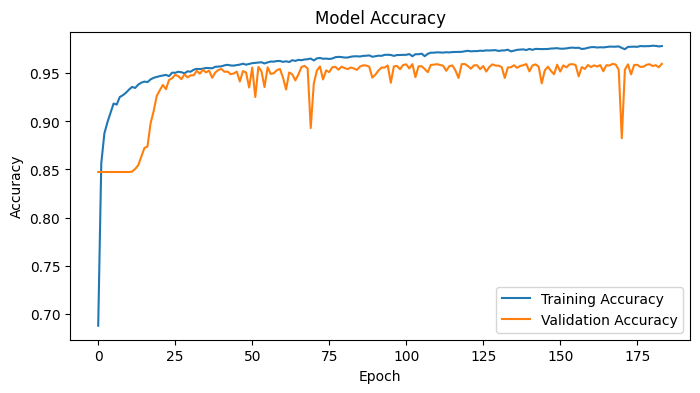

In [ ]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
save_path = '/content/drive/MyDrive/Student/Ovi/Code/Models with TTS_AUG/customSegUnetWithoutBBacc.png'  # Adjust the path as needed
plt.savefig(save_path)
plt.show()


**Test Accuracy**

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score, confusion_matrix
import tensorflow as tf

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print the test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])



3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9594 - binary_io_u_2: 0.8623 - dice_coeff: 0.8693 - f1_score: 0.8730 - jaccard_index: 0.7746 - loss: 0.1326 - mae: 0.0419 - mean_iou: 0.7746 - precision: 0.8961 - recall: 0.8511 - specificity: 0.9807
Test loss: 0.1334533989429474
Test accuracy: 0.959259033203125


**Confusion Metrics**

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step


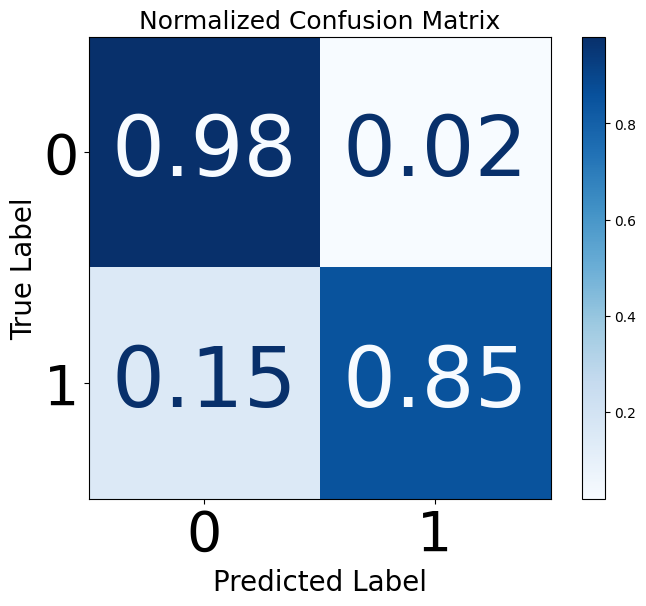

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Y_pred = model.predict(x_test)

Y_pred_binary = (Y_pred > 0.5).astype("int32")

# Flatten the arrays (for segmentation tasks)
Y_pred_flat = Y_pred_binary.flatten()
Y_test_flat = y_test.flatten()
conf_matrix = confusion_matrix(Y_test_flat, Y_pred_flat)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")

for text in disp.text_.ravel():
    text.set_fontsize(60)

ax.tick_params(axis='both', which='major', labelsize=40)

ax.set_xlabel('Predicted Label', fontsize=20)
ax.set_ylabel('True Label', fontsize=20)

plt.title('Normalized Confusion Matrix', fontsize=18)
plt.savefig('/content/drive/MyDrive/Student/Ovi/Code/CustomSegunetWithOutBBconfusion metrics.png', bbox_inches='tight', dpi=300)
plt.show()
